In [1]:
using MatrixNetworks
using Distributions
using Clustering
using BenchmarkTools, Compat
using DelimitedFiles
using SparseArrays
using LinearAlgebra
using EllipsoidalGraphEmbedding
using Random
#using Arpack
using Plots, LaTeXStrings
using IterTools
using Statistics
using Measures


In [32]:
# name = "dodecahedral_graph"
# list = readdlm("data/smallgraphs/dodecahedral_graph.txt")
# # number of columns of initial guess
# d0 = 10

name = "bull_graph"
list = readdlm("data/smallgraphs/bull_graph.txt")
# number of columns of initial guess
d0 = 5

list = list .+ 1 # indices start from 0
A = adj_matrix_cc(list)

5×5 SparseMatrixCSC{Int64, Int64} with 10 stored entries:
 ⋅  1  1  ⋅  ⋅
 1  ⋅  1  1  ⋅
 1  1  ⋅  ⋅  1
 ⋅  1  ⋅  ⋅  ⋅
 ⋅  ⋅  1  ⋅  ⋅

In [33]:
N = size(A)[1]


# shape of embedding
shape = "Ellipsoidal";
n_clusters = 10

# Initialization
community = zeros(Int64,N,1)
x_embed,community,sigma =  @time sphere_embed_cluster(A, d0,shape, n_clusters)


println("embedding effective dim= ",dim_eff(sigma,0.01))

# nicer plots
pgfplotsx()

p2 = Plots.plot(1:length(sigma),sigma.^2/N,seriestype=:scatter, legend = false,yticks = 0:0.1:0.5,xtickfontsize=10,ytickfontsize=10, xguidefontsize=15, yguidefontsize=15, marker=:square)
Plots.xlabel!("Eigenvalue index")
Plots.ylabel!("Eigenvalue")
Plots.title!(L"Spectrum of $H_\star H_\star^\top/n$")
savefig("figures/"*name*"_spectrum.pdf")

 ------- Acc Projected Power Iteration -------
The iteration has become stationary after 43 iterations
  0.000512 seconds (797 allocations: 140.641 KiB)
 -------------- Clustering ------- 
dimension of embedding used for clustering: 5
Number of updates: 0
Modularity: -0.1
Number of communities: 4
 -------------------------------------------- 
The first 5 squared singular values divided by N : 
[0.7266246752485983, 0.2733753247513706, 3.1158805800090887e-14, 4.939629062550638e-32, 4.733999390016127e-34]
 -------------------------------------------- 
  0.001931 seconds (2.10 k allocations: 243.328 KiB)
embedding effective dim= 2


"/Users/mfanuel/Documents/Code/juliaTemplate/EllipsoidalGraphEmbedding/notebooks/figures/bull_graph_spectrum.pdf"

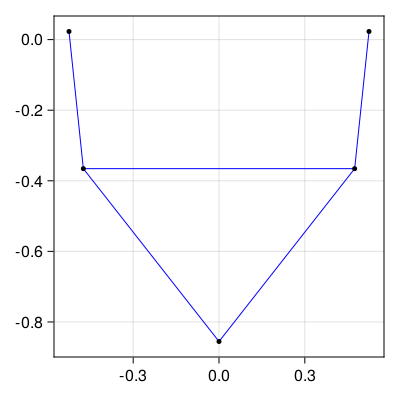

In [34]:
using Graphs, GraphPlot
using CairoMakie
CairoMakie.activate!(type="png")
set_theme!(resolution=(400, 400))
using GraphMakie: graphplot
using GraphMakie: graphplot!
using CairoMakie.Colors

g = Graph(A)
x = x_embed'
function mylayout(g)
    # create iterator going over x-coord and y-coord 
    return Point.(zip(x[:, 1], x[:, 2]))
end

f, ax, p = graphplot(g; layout=mylayout,edge_color=:blue,node_size=5,edge_width=1)  

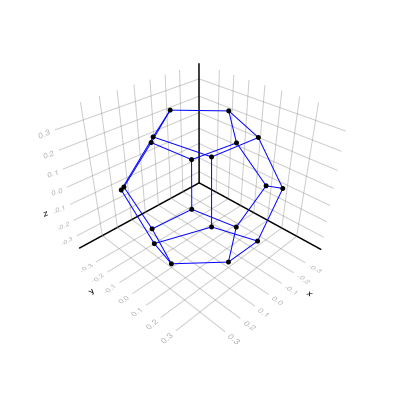

In [31]:
g = Graph(A)
x = x_embed'
function mylayout(g)
    # create iterator going over x-coord and y-coord 
    return Point.(zip(x[:, 1], x[:, 2], x[:, 3]))
end

f, ax, p = graphplot(g; layout=mylayout,edge_color=:blue,node_size=5,edge_width=1)  